# Axions from Topological Cosmic Strings

In [23]:
using PyPlot
using DelimitedFiles
using Interpolations
using Polynomials
using Printf

include("AxionStrings.jl")
include("plot.jl")

field_plot (generic function with 1 method)

In [24]:
p = load_parameters()

Main.AxionStrings.Parameter(2.0, 3.0, 20.085536923187668, 64, 0.01, 42, 1.0, 0.3138365144248073, 3.8442310281591165, 6.3380654656113595, 2.493834437452243, 250, 20, 1)

## Energies

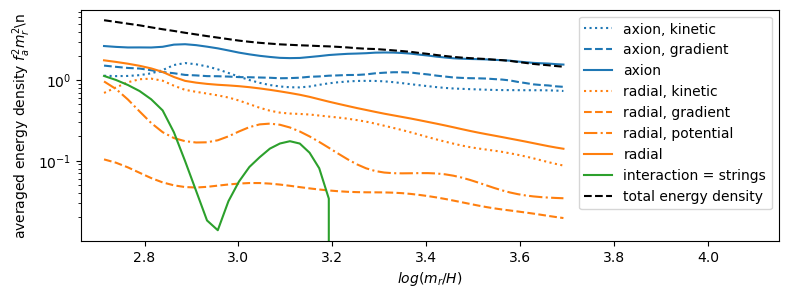

In [15]:
data = readdlm("energies.dat")
(tau, axion_kinetic, axion_gradient, axion_total,
   radial_kinetic, radial_gradient, radial_potential,
   radial_total, interaction, total) = tuple([data[:, i] for i in 1:size(data, 2)]...)
logs = AxionStrings.tau_to_log.(tau)

figure(figsize=(9, 3))
plot(logs, axion_kinetic, color="tab:blue", ls=":", label="axion, kinetic")
plot(logs, axion_gradient, color="tab:blue", ls="--", label="axion, gradient")
plot(logs, axion_total, color="tab:blue", ls="-", label="axion")
plot(logs, radial_kinetic, color="tab:orange", ls=":", label="radial, kinetic")
plot(logs, radial_gradient, color="tab:orange", ls="--", label="radial, gradient")
plot(logs, radial_potential, color="tab:orange", ls="-.", label="radial, potential")
plot(logs, radial_total, color="tab:orange", ls="-", label="radial")
plot(logs, interaction, color="tab:green", ls="-", label="interaction = strings")
plot(logs, total, color="black", ls="--", label="total energy density")
# plot(logs, axion_kinetic ./ total, color="tab:blue", ls="-", label="axion, kinetic")
# plot(logs, axion_gradient ./ total, color="tab:blue", ls="--", label="axion, gradient")
# plot(logs, axion_total ./ total, color="tab:blue", ls="-", lw=2, label="axion")
# plot(logs, radial_kinetic ./ total, color="tab:orange", ls="-", label="radial, kinetic")
# plot(logs, radial_gradient ./ total, color="tab:orange", ls="--", label="radial, gradient")
# plot(logs, radial_potential ./ total, color="tab:orange", ls=":", label="radial, potential")
# plot(logs, radial_total ./ total, color="tab:orange", ls="-", lw=2, label="radial")
# plot(logs, interaction ./ total, color="tab:green", ls="-", label="interaction axion and radial = strings")
yscale("log")
xlim(xlim()[1], 4.15)
xlabel(raw"$log(m_r / H)$")
ylabel(raw"averaged energy density $f_a^2 m_r^2$\n")
legend()
savefig("energy_densities.pdf")

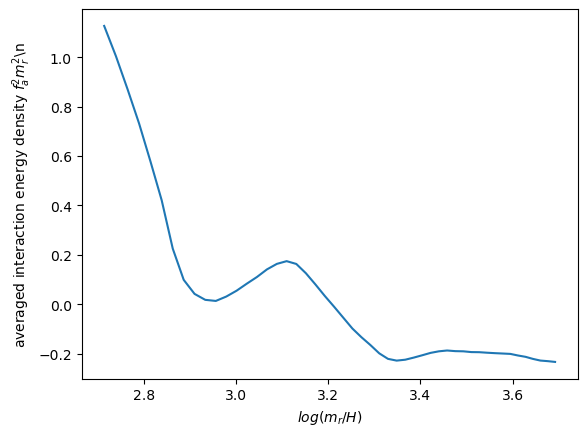

PyObject Text(32.60000000000001, 0.5, 'averaged interaction energy density $f_a^2 m_r^2$\\n')

In [17]:
plot(logs, interaction)
xlabel(raw"$log(m_r / H)$")
ylabel(raw"averaged interaction energy density $f_a^2 m_r^2$\n")

## Velocities and Lorenz Factors

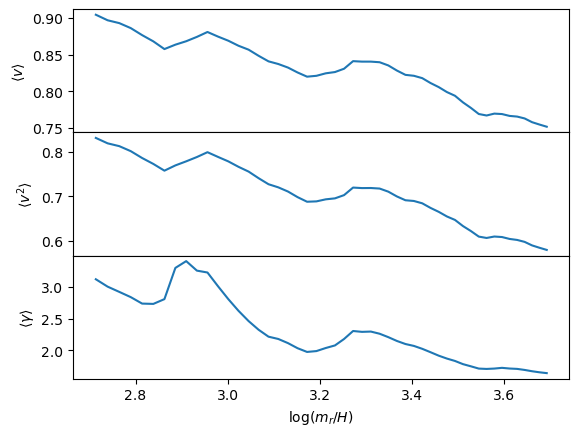

In [9]:
data = readdlm("velocities.dat")
mean_v, mean_v2, mean_gamma = data[:, 2], data[:, 3], data[:, 4]

fig, axs = subplots(3, 1, sharex=true)
fig.subplots_adjust(hspace=0)
axs[1].plot(logs, mean_v)
axs[2].plot(logs, mean_v2)
axs[3].plot(logs, mean_gamma)

axs[3].set_xlabel(raw"$\log(m_r / H)$")
axs[1].set_ylabel(raw"$\langle v \rangle$")
axs[2].set_ylabel(raw"$\langle v^2 \rangle$")
axs[3].set_ylabel(raw"$\langle \gamma \rangle$")

savefig("velocties.pdf")

## String Length / Scaling Parameter

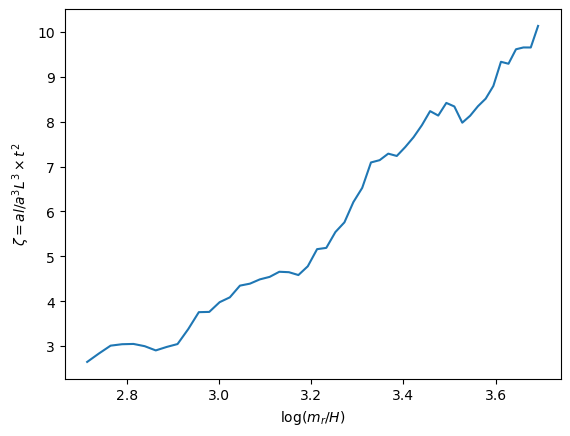

In [18]:
data = readdlm("string_length.dat")
taus, zeta = data[:, 1], data[:, 2]
logs = AxionStrings.tau_to_log.(taus)

figure()
plot(logs, zeta)
xlabel(raw"$\log(m_r / H)$")
ylabel(raw"$\zeta = a l / a^3 L^3 \times t^2$")
savefig("string_length.pdf")

## Spectrum of Free Axions

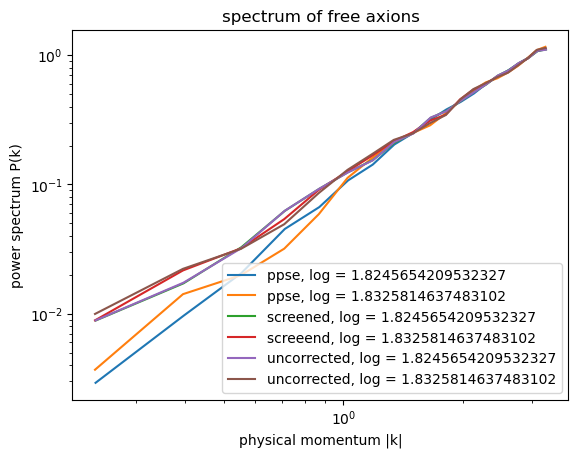

In [21]:
data = readdlm("spectrum1.dat")
k1, P1_ppse, P1_uncorrected, P1_screened = data[:, 1], data[:, 2], data[:, 3], data[:, 4]
data = readdlm("spectrum2.dat")
k2, P2_ppse, P2_uncorrected, P2_screened = data[:, 1], data[:, 2], data[:, 3], data[:, 4]
tau1 = p.Delta_tau * (p.nsteps - 1)
tau2 = p.Delta_tau * p.nsteps

log1 = AxionStrings.tau_to_log(tau1)
log2 = AxionStrings.tau_to_log(tau2)

log_mid, ks, F_ppse = AxionStrings.compute_instanteous_emission_spectrum(P1_ppse, P2_ppse, k1, k2, tau1, tau2)
_, _, F_screened = AxionStrings.compute_instanteous_emission_spectrum(P1_screened, P2_screened, k1, k2, tau1, tau2)

#F_fit_ppse = fit(log.(ks[1:end-1]), log.(F_ppse[1:end-1]), 1)
#F_fit_screened = fit(log.(ks[1:end-1]), log.(F_screened[1:end-1]), 1)
#q_fit_ppse = -F_fit_ppse[1]
#q_fit_screened = -F_fit_screened[1]

my_norm(ks, xs) = sqrt(sum(xs.^2) * (ks[2] - ks[1]))
normalize(ks, xs) = xs ./ my_norm(ks, xs)

figure()
plot(k1, normalize(k1, P1_ppse), label="ppse, log = $log1")
plot(k2, normalize(k2, P2_ppse), label="ppse, log = $log2")
plot(k1, normalize(k1, P1_screened), label="screened, log = $log1")
plot(k2, normalize(k2, P2_screened), label="screeend, log = $log2")
plot(k1, normalize(k1, P1_uncorrected), label="uncorrected, log = $log1")
plot(k2, normalize(k2, P2_uncorrected), label="uncorrected, log = $log2")
xlabel("physical momentum |k|")
ylabel("power spectrum P(k)")
xscale("log")
yscale("log")
legend()
title("spectrum of free axions")
savefig("spectra.pdf")

## Instantaneous Emission Spectrum

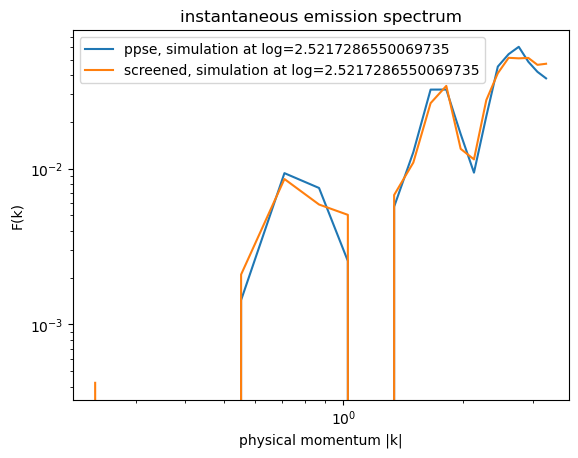

In [22]:
figure()
loglog(ks, F_ppse, label="ppse, simulation at log=$log_mid")
loglog(ks, F_screened, label="screened, simulation at log=$log_mid")
#loglog(ks[1:end-1], exp.(F_fit_ppse.(log.(ks[1:end-1]))), label="ppse, fit q = $q_fit_ppse")
#loglog(ks[1:end-1], exp.(F_fit_screened.(log.(ks[1:end-1]))), label="screened, fit q = $q_fit_screened")
xlabel("physical momentum |k|")
ylabel("F(k)")
title("instantaneous emission spectrum")
legend()
savefig("instant_emission_spectrum.pdf")